# ※ Plotly for Visualization

In [2]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# investing 데이터 불러오기
import FinanceDataReader as fdr
from scipy import stats # 회귀분석, 상관분석을 하기위해서

# 날짜 모듈
from dateutil.parser import parse # 다양한 날짜 표현(문자형)을 날짜 데이터로 변환
from datetime import datetime, date, timedelta  # datetime 날짜+시간, date 날짜 , timedelta 날짜 간 
from dateutil.relativedelta import relativedelta # 기준 날로 부터 years, months, days 과거/미래로 이동 가능

## 연습용 데이터 불러오기

In [3]:
# 코스피 코스닥 데이터 불러오기 
ks= fdr.DataReader("KS11","2018-01-01",)
kq= fdr.DataReader("KQ11","2018-01-01",)

In [4]:
ko_df = ks["Close"].to_frame() # series 객체 > DataFrame 객체로

In [5]:
ko_df["kosdaq"] = kq["Close"] 

In [6]:
ko_df.columns =["kospi","kosdaq"] # df 열 이름 설정

In [7]:
# 결측치 처리 
ko_df.fillna(method="ffill",inplace=True) # 결측치 위의 값 대신 입력

In [8]:
# 결측치 행 삭제하기 
ko_df.dropna(axis=0,inplace=True)

In [9]:
ko_df.head()

,kospi,kosdaq
Date,,
2018-01-02,2479.65,812.45
2018-01-03,2486.35,822.31
2018-01-04,2466.46,808.01
2018-01-05,2497.52,828.03
2018-01-08,2513.28,839.51


## plotly 패키지 불러오기

In [1]:
# jupyterlab에서 plotly offline 모드 사용하기
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot # offline

init_notebook_mode(connected=True)

import plotly.graph_objs as go  # 그래프 객체 생성

## 1.  산점도 ~ 회귀선

In [10]:
# 회귀선을 구하기 위한 과정: X,Y 설정
x = ks["Close"]
y = kq["Close"]
slope, intercept, r_value, p_value, std_err=stats.linregress(x,y) # 회귀계수, 상관계수 구하기

# 회귀선
reg_line = (slope * x) + intercept

### plotly - 장점: 인터렉티브 기능 

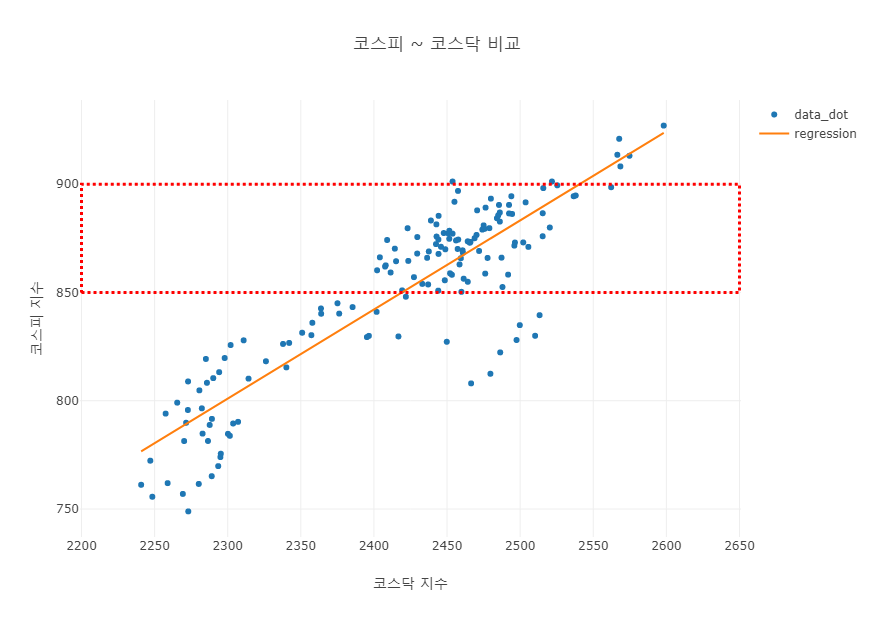

In [11]:
# 산점도
trace1 = go.Scatter(x=x,y=y,name="data_dot",mode="markers")

# 회귀선
trace2 = go.Scatter(x=x,y=reg_line,name="regression",mode='lines')

# 그래프 설정 
layout = go.Layout(autosize=False,  # autosize = 창 크기에 따라서 그래프 크기 자동조정
                   title="코스피 ~ 코스닥 비교", # title = 제목설정
                   yaxis=dict(title="코스피 지수"), # yaxis = y축 설정(이름 등)
                   xaxis=dict(title="코스닥 지수"), # xaxis = x축 설정(이름 등)
                   height=600,width=900, # height(세로크기), width(가로크기)
                   shapes=[dict(type='rect',x0=2200,y0=850,x1=2650,y1=900, # shapes을 통해서 vertical, horizntal line 및 박스 설정
                             line=dict(color="red",width=3,dash='dot'))] 
                  )

data = [trace1,trace2] # 항상 trace를 list 형태로
fig=go.Figure(data,layout) # trace와 layout으로 그래프 객체로 변환
iplot(fig) # 그래프 실행 

## matplotlib과 비교
### 1번: matplotlib 버전

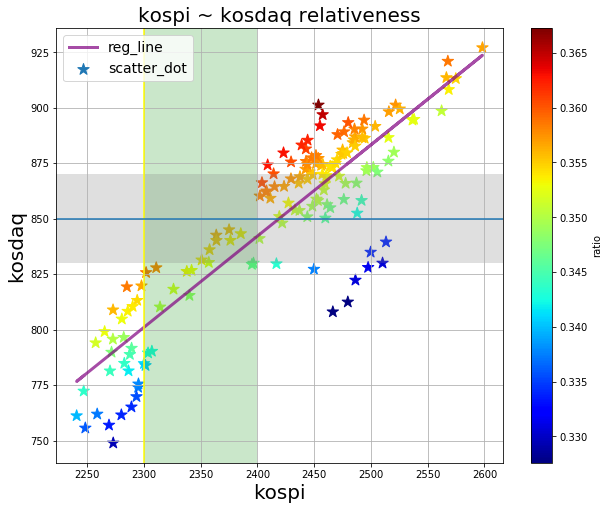

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,marker="*",label="scatter_dot",c=(y.values/x.values),\
            cmap=mpl.cm.jet,s=144)
plt.plot(x,reg_line,c="purple",alpha=0.7,lw=3,label="reg_line")

# 컬러바 
plt.colorbar(label="ratio")

# 타이틀 축 제목
plt.title("kospi ~ kosdaq relativeness",size=20)
plt.ylabel("kosdaq",size=20)
plt.xlabel("kospi",size=20)

# 수평,수직선 및 범위
plt.axvline(x=2300,color="yellow")
plt.axhline(y=850)
plt.axvspan(2300,2400,facecolor='#2ca02c', alpha=0.25)
plt.axhspan(830, 870, facecolor='0.5', alpha=0.25)

plt.grid()
plt.legend(loc=2,fontsize=14)
plt.show()

## 2. 시계열 데이터 비교 (y축 2개)

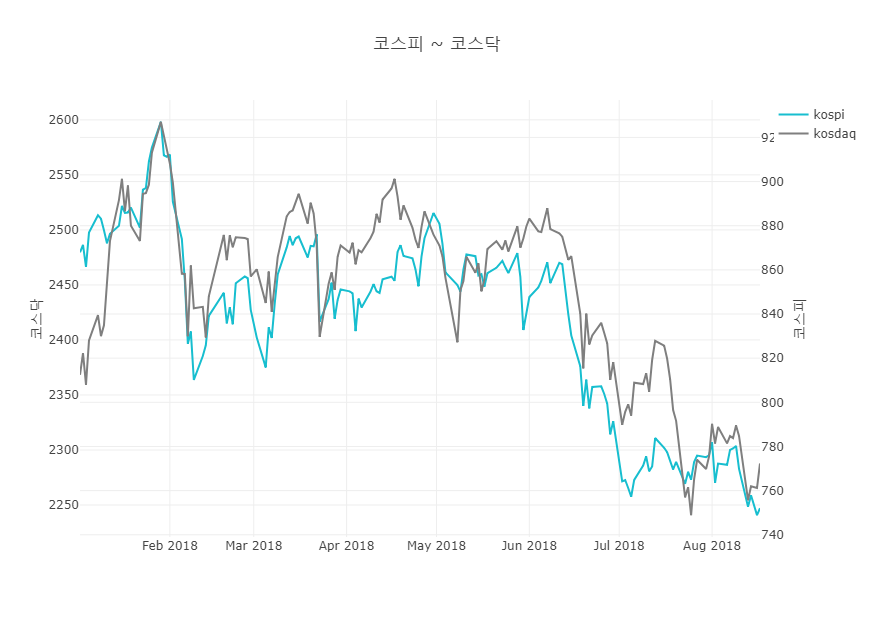

In [13]:
# 첫번째 그래프 그리기
t1 = go.Scatter(x=ko_df.index,y=ko_df["kospi"],name="kospi",mode="lines",line = dict(color = '#17BECF'))
# 두번째 그래프 르기기
t2 = go.Scatter(x=ko_df.index,y=ko_df["kosdaq"],name="kosdaq",mode="lines",line = dict(color = '#7F7F7F'),
                yaxis='y2') # yaxis = 'y2' >> 두번째 축을 나타냄

layout = go.Layout(autosize=False,
                   title="코스피 ~ 코스닥",
                   yaxis=dict(title="코스닥"),
                   yaxis2=dict(title='코스피',overlaying="y",side="right"),
                   height=600,width=1100
                    )

data = [t1,t2]
fig = go.Figure(data,layout)
iplot(fig)

In [14]:
# 기준일 시점으로 변화를 측정
rela_ko_df=(ko_df/ko_df.iloc[0])

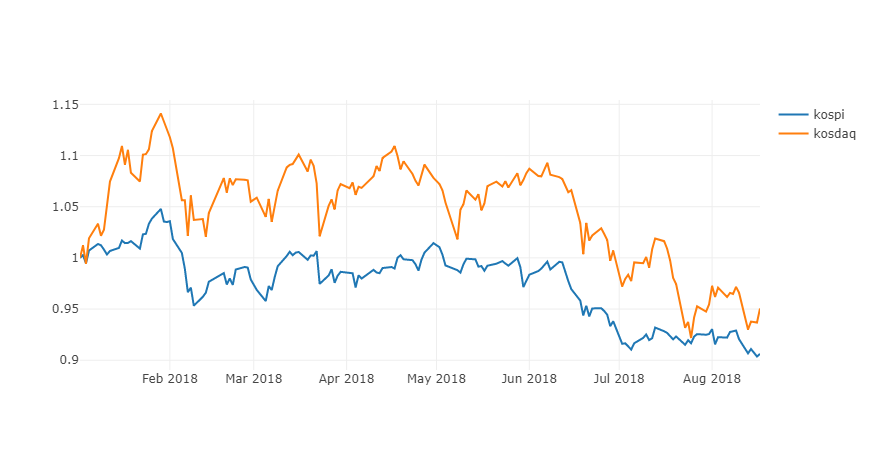

In [15]:
## 데이터 프레임 항목별로 볼 수 있음
iplot([{'x': rela_ko_df.index,'y': rela_ko_df[col],'name': col} for col in rela_ko_df.columns])

### 2번: matplotlib 버전

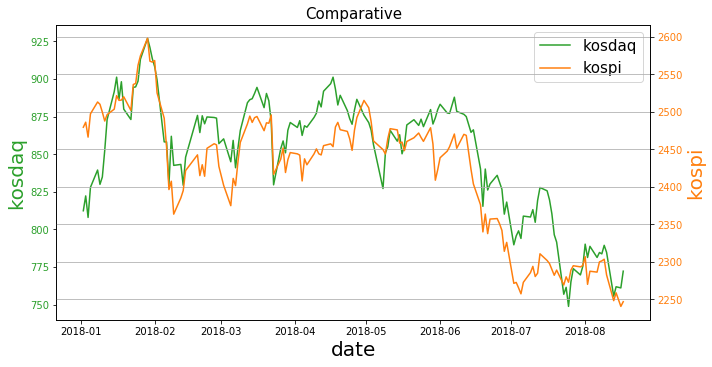

In [16]:
fig, ax1 = plt.subplots(figsize=(10,5)) # y축 2개 설정 

# y1축 설정
color = "tab:green"
ax1.set_xlabel("date",fontsize=20)
ax1.set_ylabel("kosdaq",color=color,fontsize=20)
# line1,: , 꼭 찍어줘야
line1, =ax1.plot(ko_df.index,ko_df["kosdaq"],color=color,label="kosdaq")
ax1.tick_params(axis="y",labelcolor=color)

ax2 = ax1.twinx() # ax1의 x축 복제

# y2축 설정
color2 = "tab:orange"
ax2.set_ylabel("kospi",color=color2,fontsize=20)
# line2,: , 꼭 찍어줘야
line2, =ax2.plot(ko_df.index,ko_df["kospi"],color=color2,label="kospi")
ax2.tick_params(axis='y', labelcolor=color2)

# legend 설정 
lines=[line1,line2]
ax1.legend(lines, [l.get_label() for l in lines],fontsize=15)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.title("Comparative",size=15)
plt.grid()
plt.show()

## 3. 박스 플롯 (변동성 비교 등)


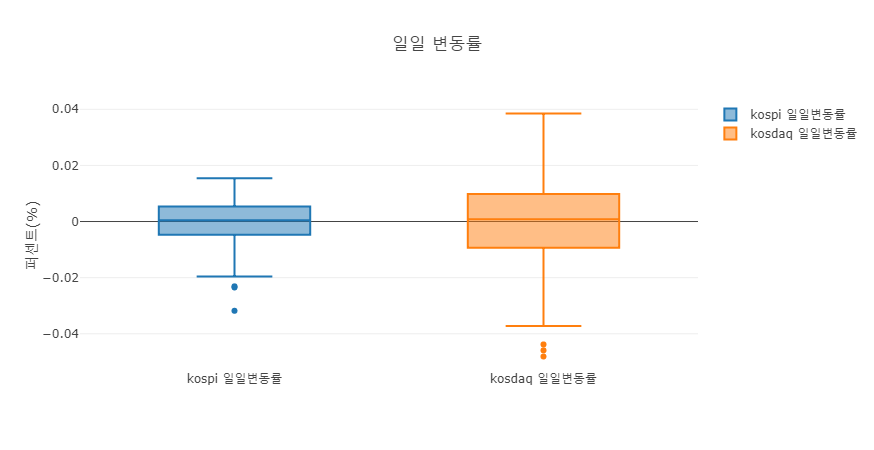

In [17]:
# 세로
y0 =ks["Change"].values
y1 =kq["Change"].values

t1 = go.Box(y=y0,name="kospi 일일변동률")
t2 = go.Box(y=y1,name="kosdaq 일일변동률")
       
layout = go.Layout(autosize=False,
                  title="일일 변동률",
                  yaxis=dict(title="퍼센트(%)"))    
    
box_data = [t1,t2]
fig = go.Figure(box_data,layout)
iplot(fig)

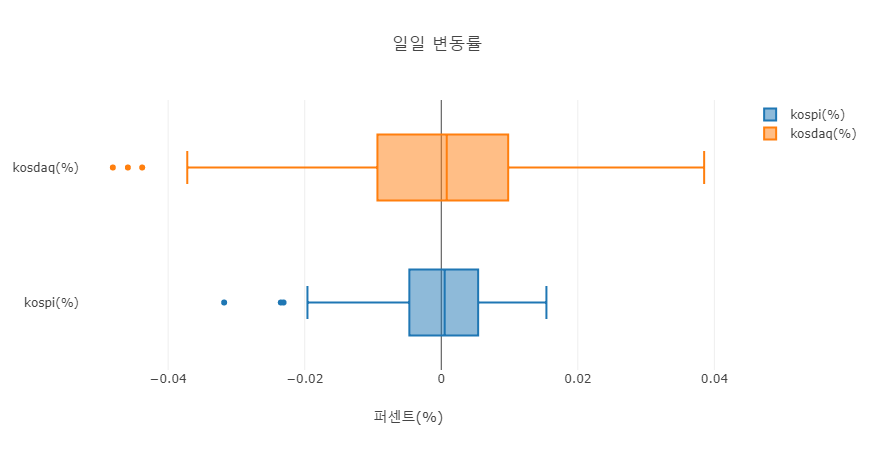

In [18]:
# 가로
y0 =ks["Change"].values
y1 =kq["Change"].values

t1 = go.Box(x=y0,name="kospi(%)")
t2 = go.Box(x=y1,name="kosdaq(%)")
       
layout = go.Layout(autosize=False,
                  title="일일 변동률",
                  xaxis=dict(title="퍼센트(%)")
                  ) 

box_data = [t1,t2]
fig = go.Figure(box_data,layout)
iplot(fig)

In [ ]:
# 데이터 프레임 cols별로 박스플롯 불러오는 코드
box_data =[]
for item in obj:
    y0=new[item]
    box_data.append(go.Box(y=y0,name=str(item)))

layout = go.Layout(title="SSS",
                  xaxis=dict(title="ddd"),
                  yaxis=dict(title="ttt"),
                  shapes=[dict(type='line',x0=0,y0=1,x1=0,y1=1,
                             line=dict(color="red",width=3))]
                  )

fig=go.Figure(box_data,layout)
iplot(fig)

# 3번 matplotlib과 비교

In [243]:
# dataframe 생성 
df3 = ks["Change"].to_frame()
df3["kosdaq"] = kq["Change"]
df3.columns =["kospi(%)",'kosdaq(%)']

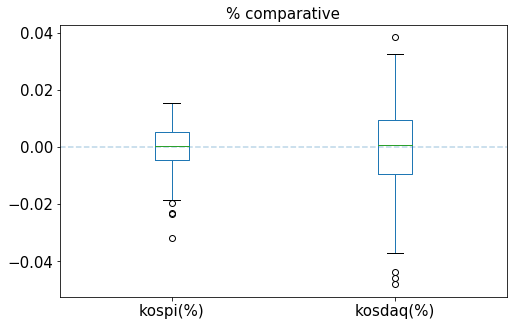

In [246]:
# DataFrame을 boxplot으로 나타내기 
plt.figure(figsize=(8,5))

df3.boxplot()

plt.title("% comparative",size=15)
plt.axhline(y=0,alpha=0.3,ls='dashed')
plt.grid(False)
plt.tick_params(labelsize=15) # tick 설정
plt.show()